# Převozník, koza, zelí a vlk
Převozník má  převézt v loďce kozu, vlka a zelí. Loďka je malá, takže se do ní vejde kromě převozníka už jen jedno zvíře, nebo nůše se zelím. Může tedy převážet buď jen kozu, nebo jen vlka, nebo jen zelí. Může také jet v loďce sám. 

Na jednom břehu nesmí nechat bez dozoru vlka a kozu (vlk by sežral kozu) ani kozu a zelí (koza by sežrala zelí). 

Bez obav může nechat na břehu vlka a zelí, protože vlk zelí nerad.

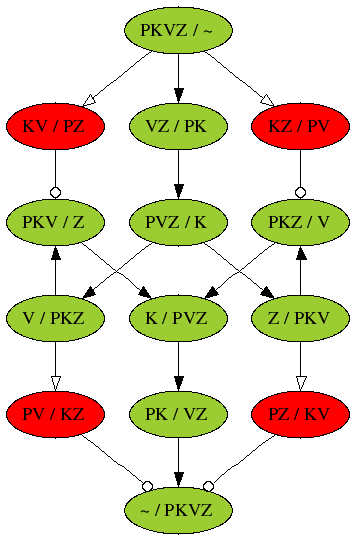


# Úkol

Vyřešte tuto logickou úlohu pomocí prohledávání do šířky a do hloubky.

Kolik je potřeba minimálně plaveb přes řeku?

- V minulém cvičení jste měli navrhnout třídu State pro zachycení stavu logické úlohy
- Nyní implementujte třídy Node a Problem. Inspiraci můžete vzít v jednoduchém algoritmu.
- Implementujte probledávání do hloubky s omezením (DLS)

In [ ]:
import copy

In [1]:
class State:
    """ 
    
    """

    generated = 0
    
    def __init__(self, left, right):                               
        # todo
        pass
        
    def expand(self, action):
        # todo
        pass               
        

    def __eq__(self, other):  
        # todo       
        pass

In [2]:
# Třída node představuje uzel ve stromě nebo grafu
class Node:
    """
        Node pro prohledávání
        
        parent - odkaz na rodičovský uzel
        state  - objekt State - korenkrétní stav bludiště
        action - akce, která vedla na tento uzel
        depth  - hloubka stromu
    """

    def __init__(self, parent=None, state=None, action=None, depth=0):
        # Konstruktor
        self.parent = parent
        self.state = state
        self.action = action
        self.depth = depth

    def __eq__(self, other):
        # přetížení porovnání pouze na porovnání stavu bludiště state
        # porovnání dalších vlastností by bylo špatné
        return self.state == other.state
    
    def succesors(self, actions):
        # metoda vrátí list následovníků, pro všechny povolené akce
        succesors = []

        # expanduj všechny možné akce. Pokud vznikne povolený stav (není None), zařaď ho do seznamu
        for action in actions:
            new_state = self.state.expand(action)
            if new_state is not None:
                # vytvoření nové nodu
                succesors.append(Node(parent=self,
                                      state=new_state,
                                      action=action,
                                      depth=self.depth + 1))
        return succesors

    def path(self):
        # metoda vrátí seznam akcí, kterými se od kořene dostaneme k nodu
        actions = []
        node=self
        while node.action is not None:
            actions.append(node.action)
            node = node.parent
        # obrácení cesty
        actions.reverse()
        return actions

In [3]:
class Problem:
    """
        Hlavní třída
        
        fringe   - list nodů k prohledání, na začátku se naplní počátečním stavem
        goal     - cílový stav (předpokládáme, že je jeden)
        actions  - seznam možných akcí        
    """

    def __init__(self, initial_state, goal, actions):
        # počáteční stav jde do seznamu k prohledání
        self.fringe = []
        self.fringe.append(Node(parent=None, state=initial_state, action=None, depth=0))
        self.goal = goal
        self.actions = actions        

    def goal_test(self, state):
        # metoda otestuje, zda jsme dosáhli cíle
        if self.goal == state:
            return True
        else:
            return False

    def select_from(self, fringe, strategy, max_depth=5):
        if strategy=="BFS":
            return fringe.pop(0)
        elif strategy=="DFS":
            return fringe.pop(-1)
        elif strategy=="DLS":            
            # todo
            pass
        else:
            return fringe.pop(0)
            

    def tree_search(self, strategy, max_depth=5):
        # prohledání stromovým algoritmem, který nekontroluje již navštívené vrcholy
        while True:
            # kontrola délky seznam k prohledání
            if len(self.fringe) == 0:
                return None
                        
            # vyběr nodu k další expanzi 
            node = self.select_from(self.fringe, strategy, max_depth)
            
            # kontrola, zda to není cíl
            if self.goal_test(node.state):
                return node
            
            # rozšíření seznamu k prohledání
            self.fringe.extend(node.succesors(self.actions))

    def graph_search(self, strategy, max_depth=5):
        # prohledání grafovým algoritmem, který kontroluje již navštívené vrcholy
        
        explored = []
        while True:
            # kontrola délky seznam k prohledání
            if len(self.fringe) == 0:
                return None
            
            # vyběr nodu k další expanzi 
            node = self.select_from(self.fringe, strategy, max_depth)
            
            # kontrola, zda to není cíl
            if self.goal_test(node.state):
                return node
            
            # přidání nodu do seznamu prohledaných nodů
            explored.append(node)
            
            # expanze nodu
            succesors = node.succesors(self.actions)

            # do seznamu nodů k prohledání se dostanou pouze nody, které se ještě neprocházely, nebo nejsou ve fridge
            for succesor in succesors:
                if (succesor not in explored) and (succesor not in self.fringe):
                    self.fringe.append(succesor)

# Prohledávání do šířky

In [4]:
problem = Problem(initial_state=State({'P', 'K', 'Z', 'V'}, set()),
                goal=State(set(), {'P', 'K', 'Z', 'V'}),
                actions=['P', 'PK', 'PV', 'PZ'],
                )
State.generated = 0
solution = problem.graph_search(strategy='BFS')
print (f"Počet prohledaných stavů {State.generated}")
if solution is not None:
    print (solution.path())
else:
    print ("Problém nemá řešení.")

# Prohledávání do hloubky

In [ ]:
problem = Problem(initial_state=State({'P', 'K', 'Z', 'V'}, set()),
                goal=State(set(), {'P', 'K', 'Z', 'V'}),
                actions=['P', 'PK', 'PV', 'PZ'],
                )
State.generated = 0
solution = problem.graph_search(strategy='DFS', max_depth=25)
print (f"Počet prohledaných stavů {State.generated}")

if solution is not None:
    print (solution.path())
else:
    print ("Problém nemá řešení.")

# Prohledávání do hloubky s omezením

In [ ]:
problem = Problem(initial_state=State({'P', 'K', 'Z', 'V'}, set()),
                goal=State(set(), {'P', 'K', 'Z', 'V'}),
                actions=['P', 'PK', 'PV', 'PZ'],
                )
State.generated = 0
solution = problem.graph_search(strategy='DLS', max_depth=3)
print (f"Počet prohledaných stavů {State.generated}")

if solution is not None:
    print (solution.path())
else:
    print ("Problém nemá řešení.")